In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [18]:
traffic_data=(r'..\data\promet_analiza.csv')

In [19]:
data = pd.read_csv(traffic_data,index_col=0)

In [20]:
data.index = pd.to_datetime(data.index)

In [21]:
traffic_roads = ['Ost_8010_208', 'DonBosco_8020_110', 'DonBosco_8020_119',
       'DonBosco_8020_122', 'DonBosco_8053_111', 'Nord_8010_205',
       'Ost_8010_209', 'Ost_8010_213', 'Ost_8010_214', 'Nord_8020_102',
       'West_8020_103', 'Sud_8020_107', 'Sud_8041_218', 'Ost_8041_221',
       'Nord_8045_203', 'Nord_8051_101']

In [22]:
promet = ['Istok_8010_208', 'DonBosco_8020_110', 'DonBosco_8020_119',
       'DonBosco_8020_122', 'DonBosco_8053_111', 'Sjever_8010_205',
       'Istok_8010_209', 'Istok_8010_213', 'Istok_8010_214', 'Sjever_8020_102',
       'Zapad_8020_103', 'Jug_8020_107', 'Jug_8041_218', 'Istok_8041_221',
       'Sjever_8045_203', 'Sjever_8051_101']

In [23]:
def scatter_fun (traffic,promet):
    df_sns = data.copy()
    i = df_sns.index
    a = sns.scatterplot(data=df_sns,y=traffic,x = i,hue='DayOfWeek',markers=["o", "x", "1"],palette=dict(Radni_dan="#9b59b6", Vikend="#3498db", Praznik="#95a5a6"))
    plt.legend()
    plt.title(promet)
    plt.xlabel('Datum')
    plt.ylabel('Promet')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [24]:
sites=['Nord','Ost','Sud','West','DonBosco']

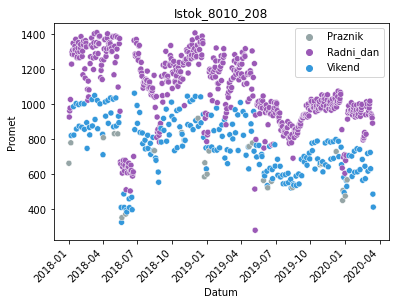

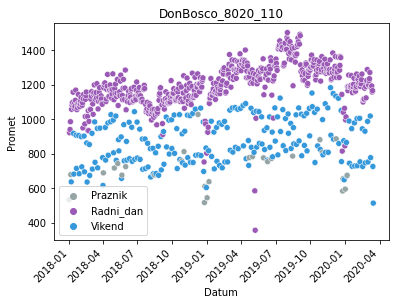

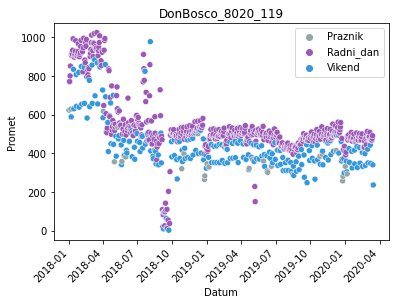

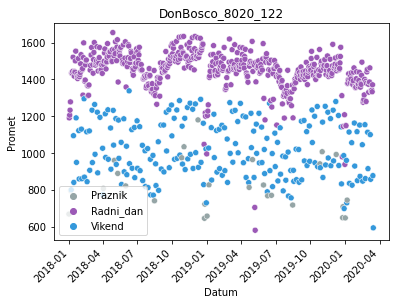

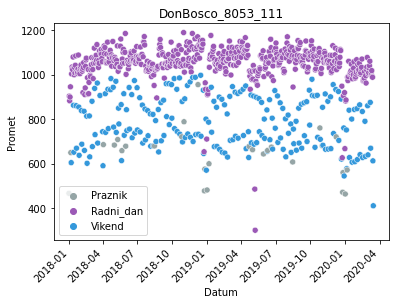

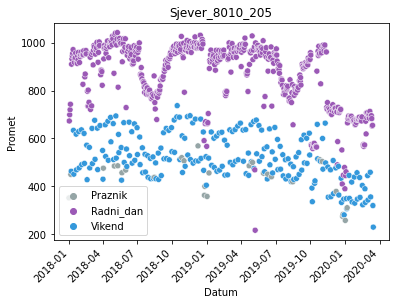

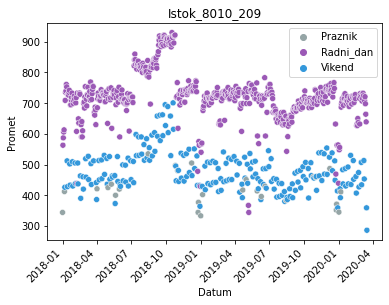

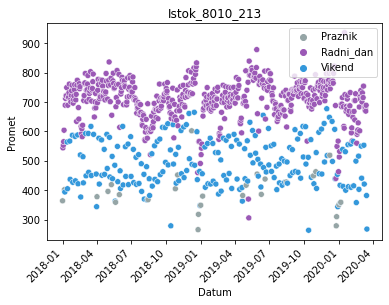

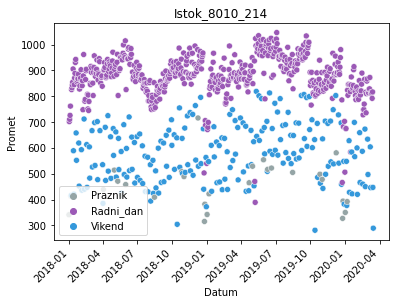

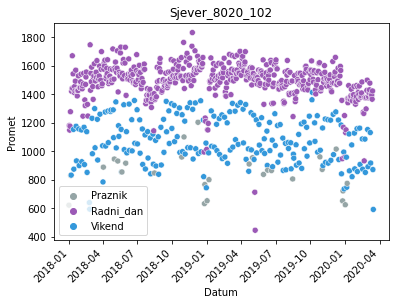

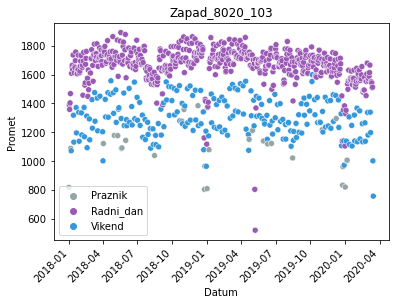

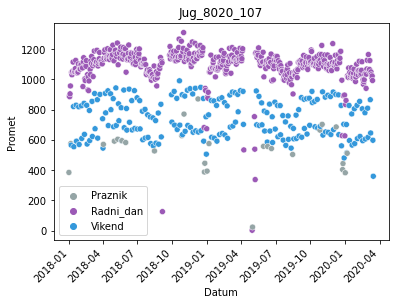

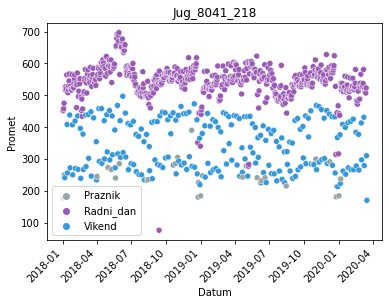

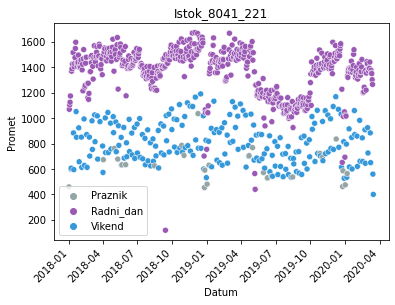

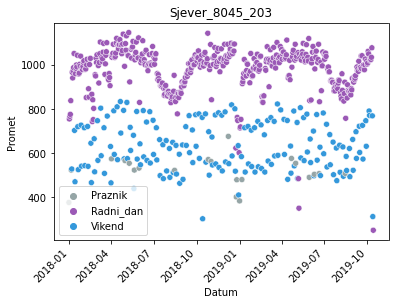

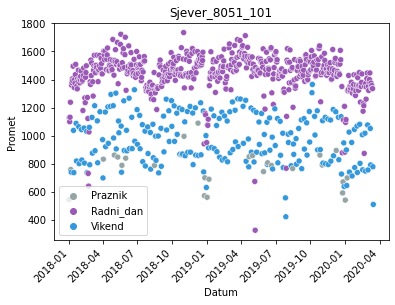

In [25]:
for site,p in zip(traffic_roads,promet):
    graf = scatter_fun(site,p)

In [29]:
def heatmap_plot(traffic,year,promet):
    df_f = data.copy()
    df_f = df_f[[traffic]].loc[year]
    df_f['month'] = df_f.index.month
    df_f['day'] = df_f.index.day
    df_pivot = df_f.pivot(index='day', columns='month', values=traffic)
    plt.figure(figsize=(8, 6), dpi=80)
    ax = sns.heatmap(df_pivot,linewidths=.5,cmap="YlGnBu")
#plt.title(year+'\n'+factor, fontdict={'fontsize':15})
    plt.title(year +', '+promet, fontdict={'fontsize':15})
    plt.xlabel('Mjesec', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Dan', fontsize = 15) # y-axis label with fontsize 15
#plt.yticks(rotation=90)    

In [30]:
years = ['2018','2019','2020']

C:\Users\vpetric\AppData\Local\Temp/ipykernel_21008/3128058738.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 6), dpi=80)
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


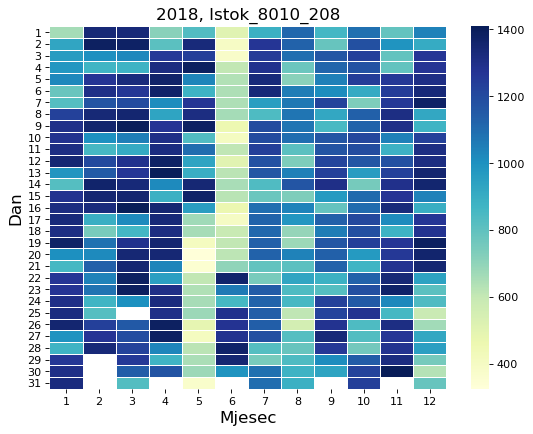

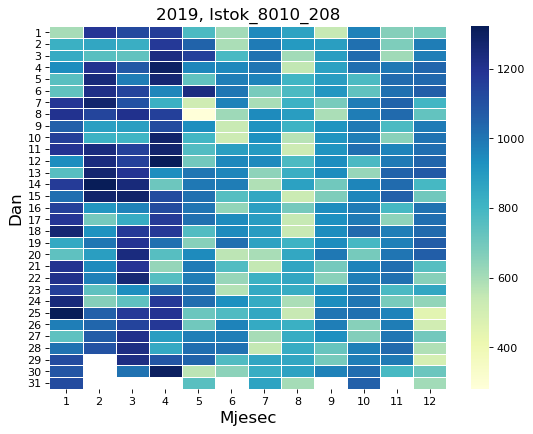

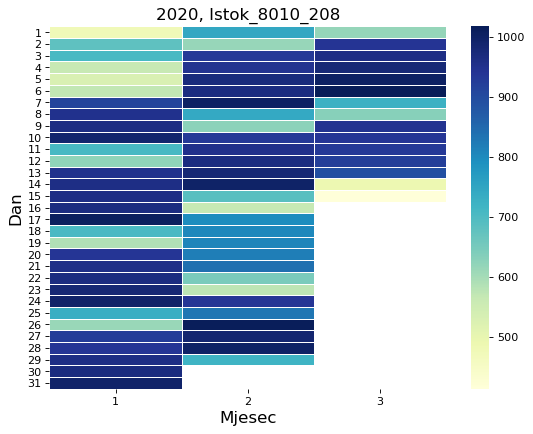

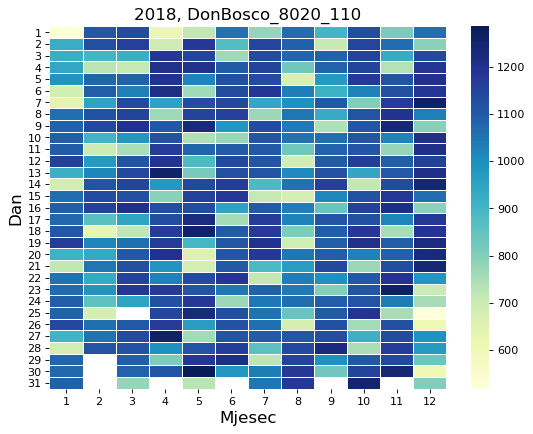

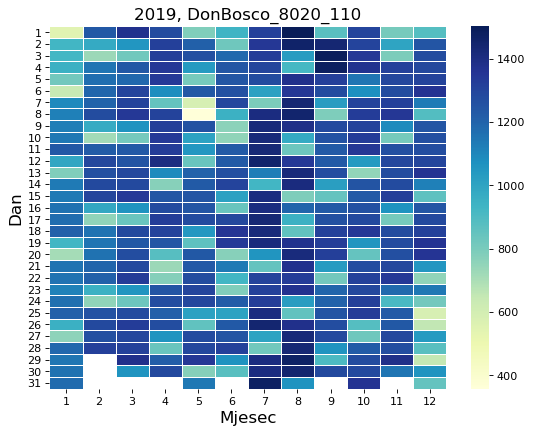

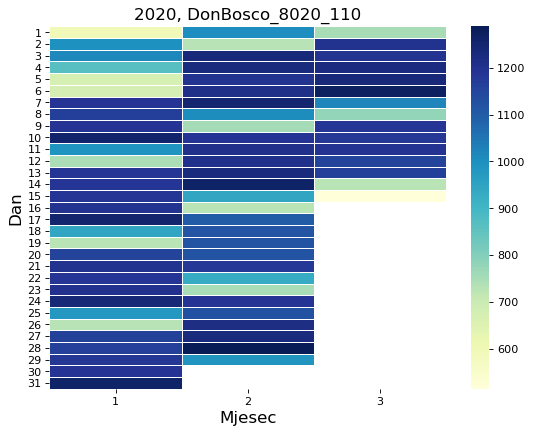

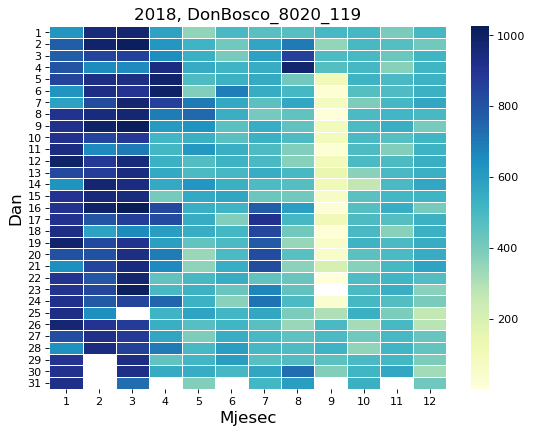

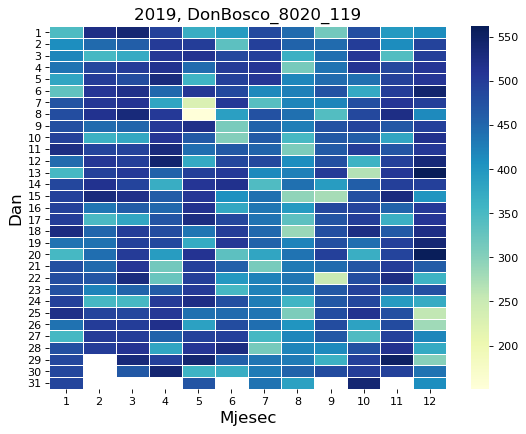

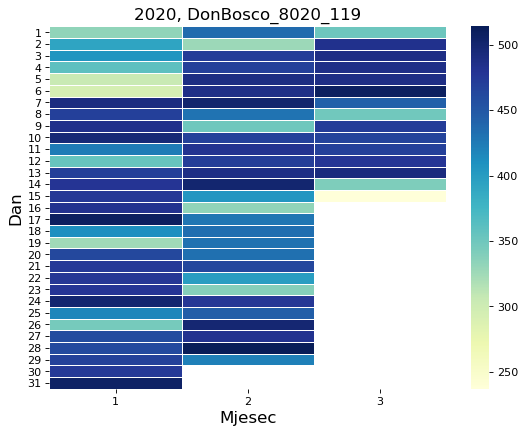

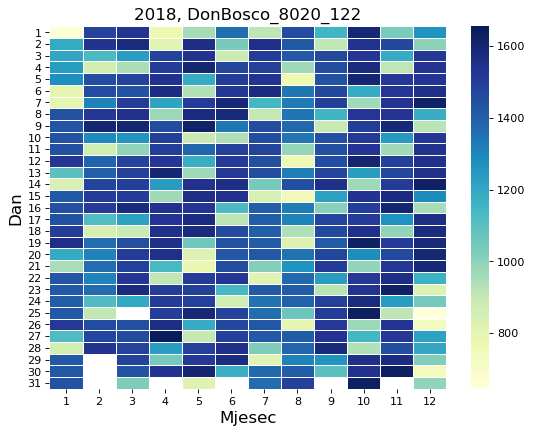

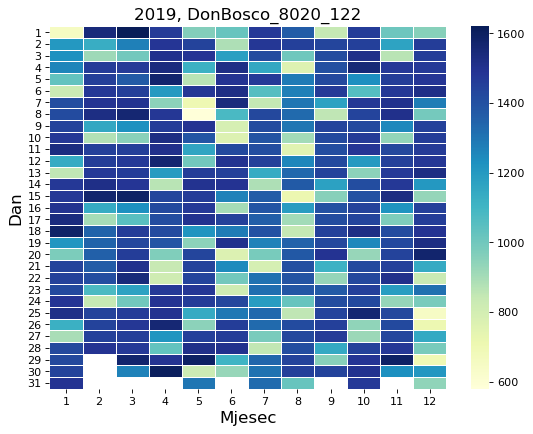

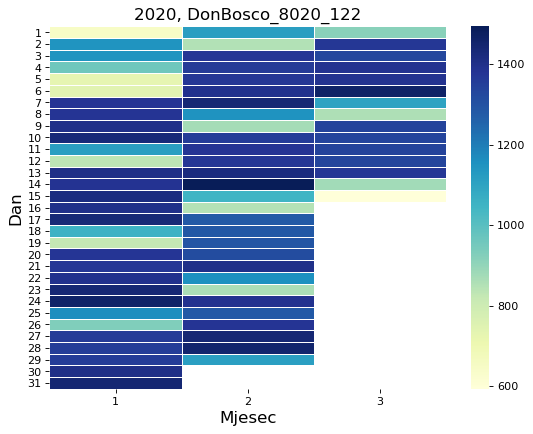

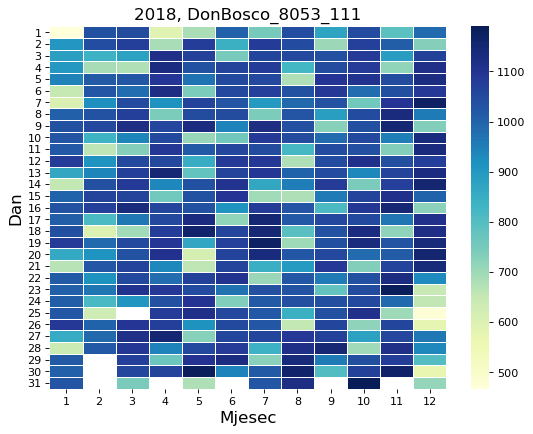

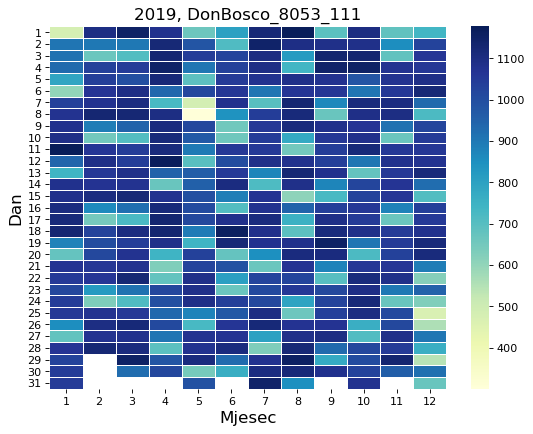

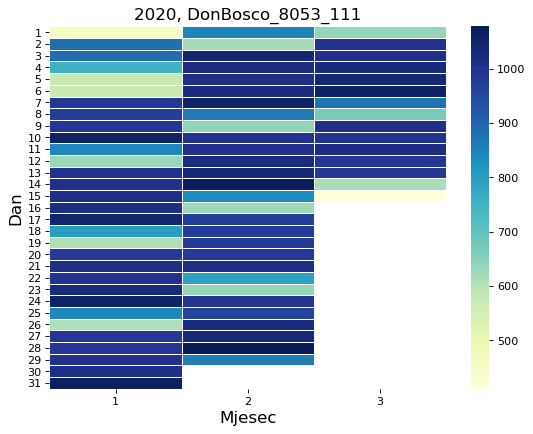

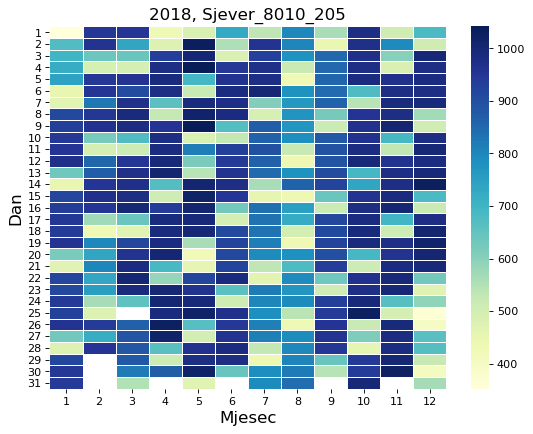

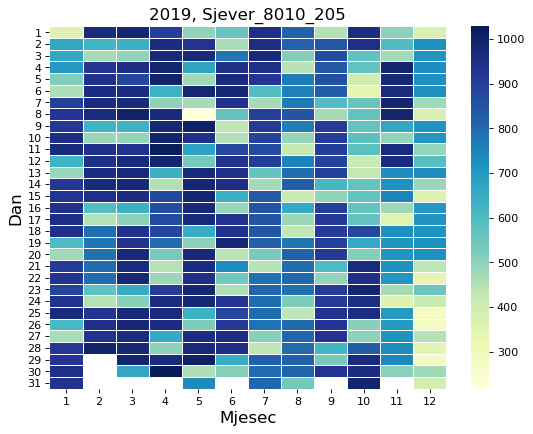

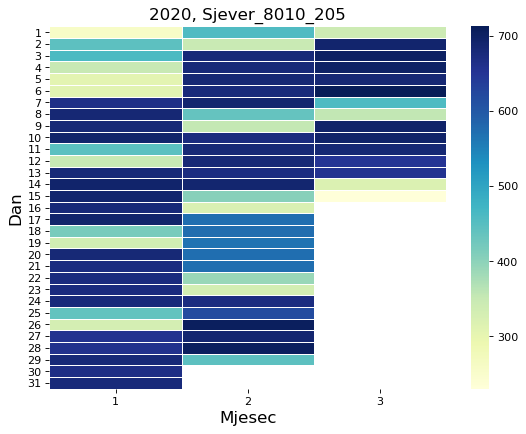

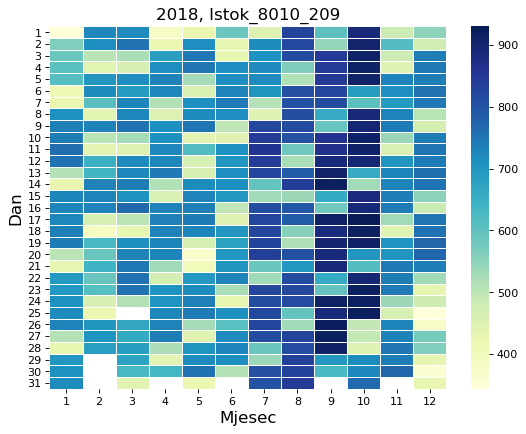

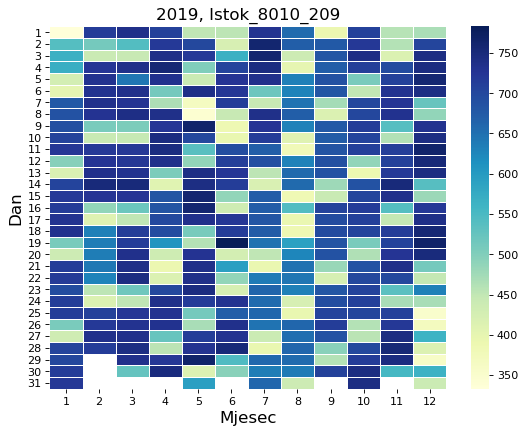

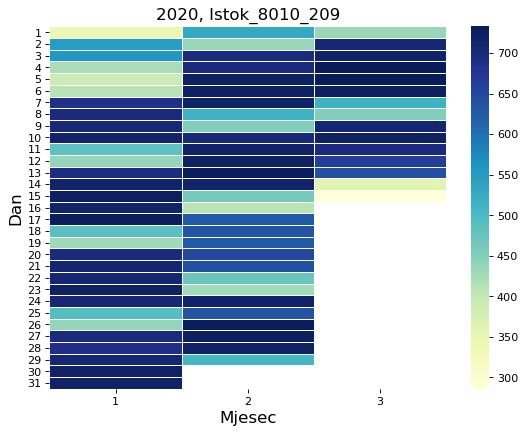

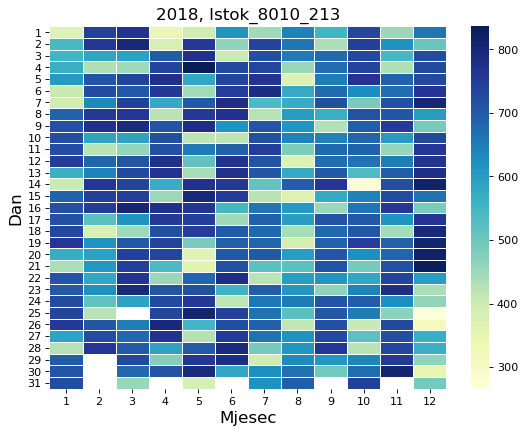

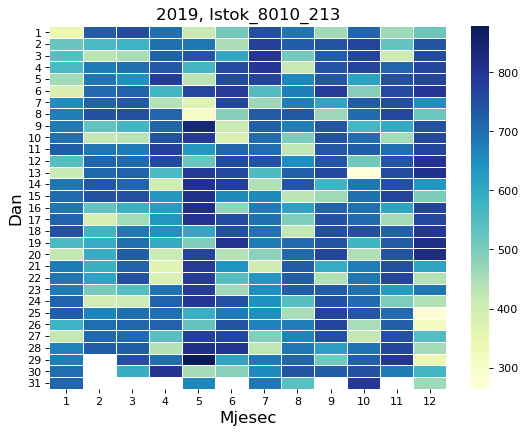

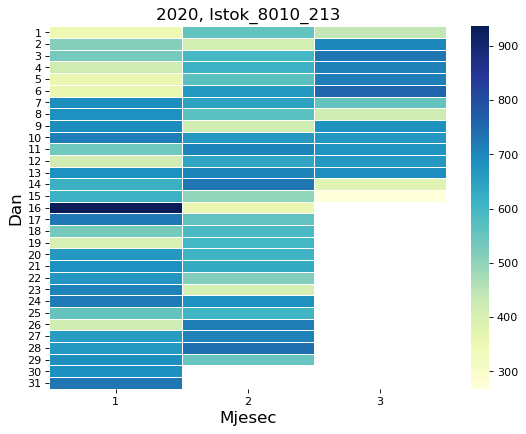

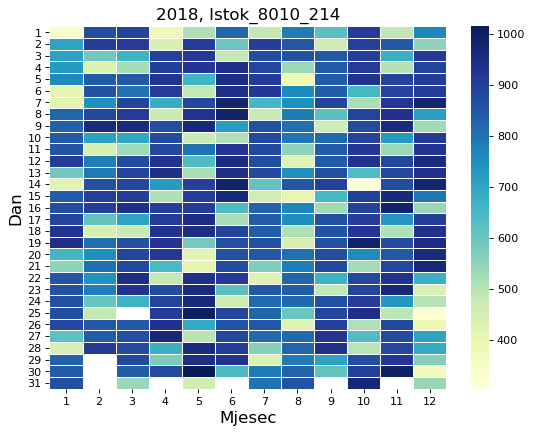

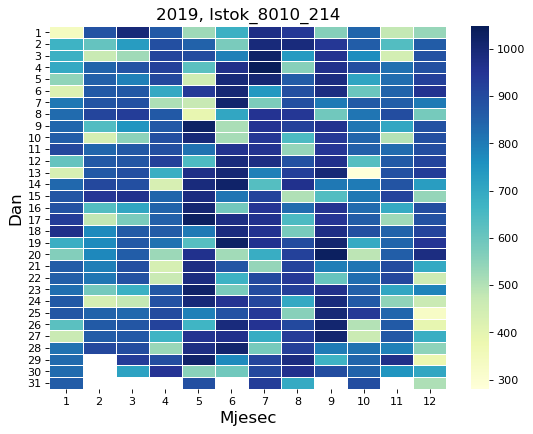

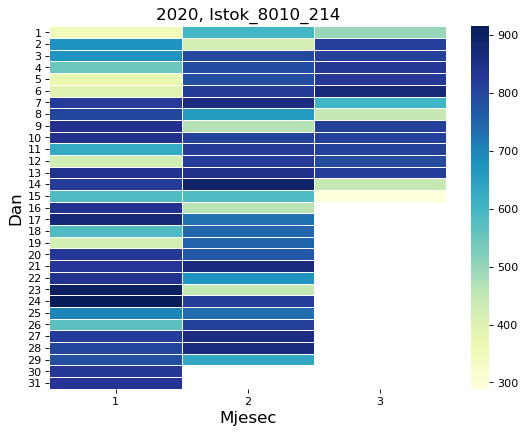

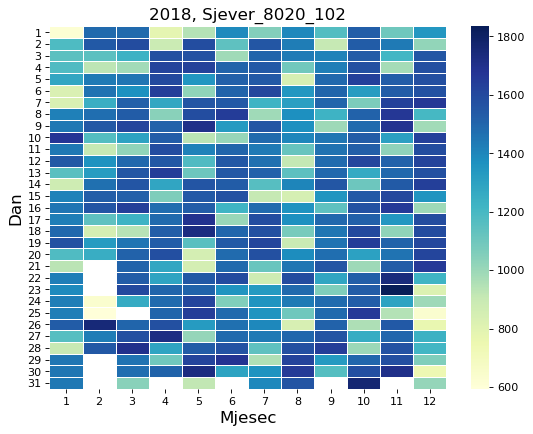

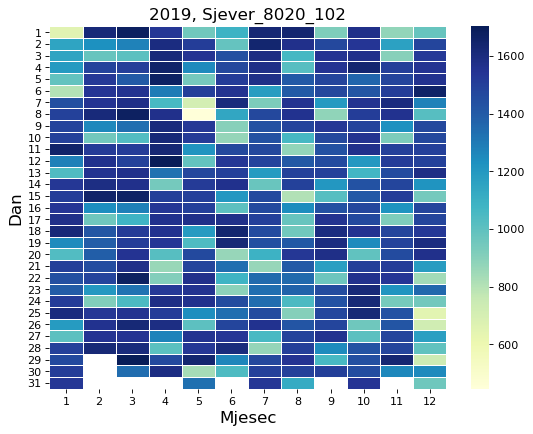

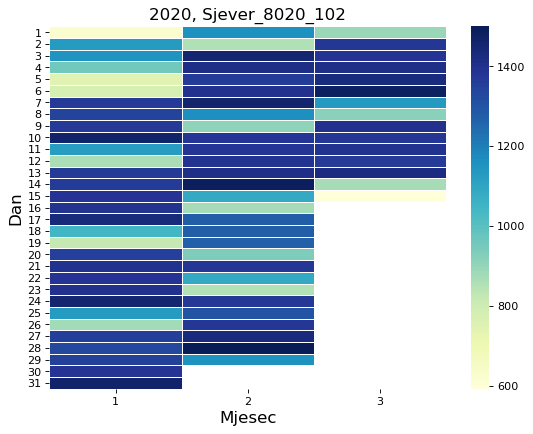

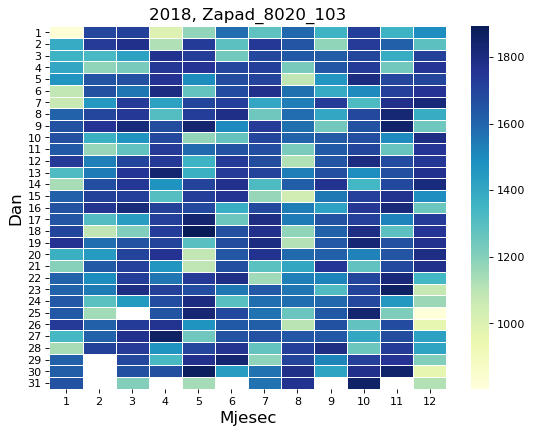

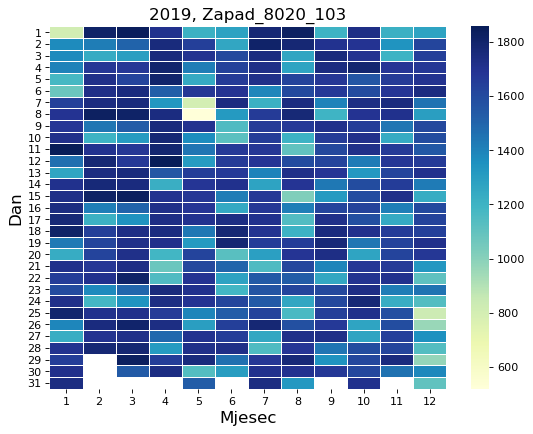

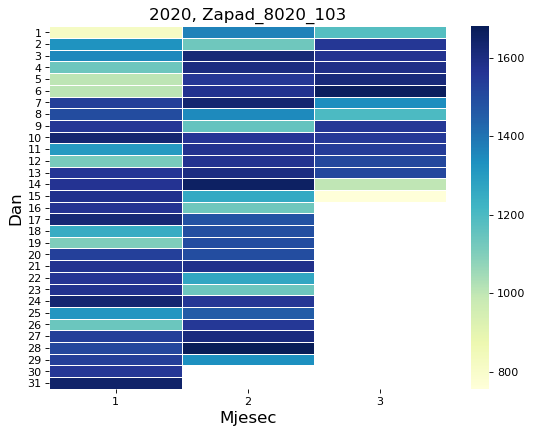

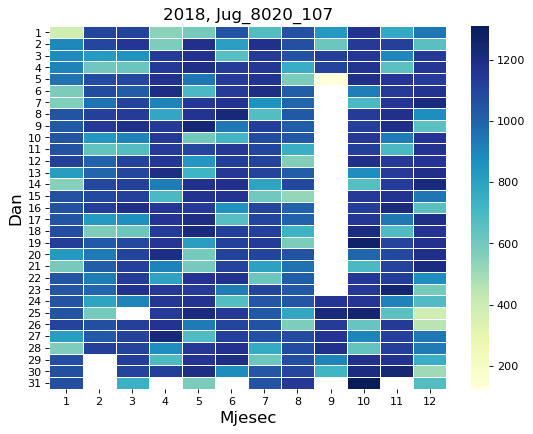

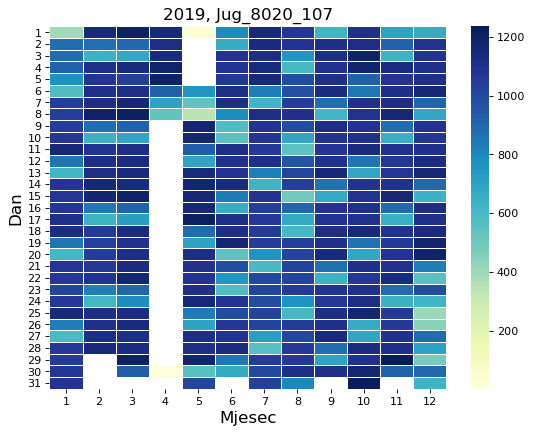

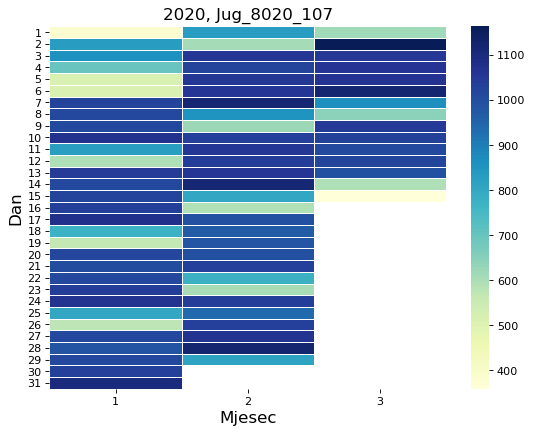

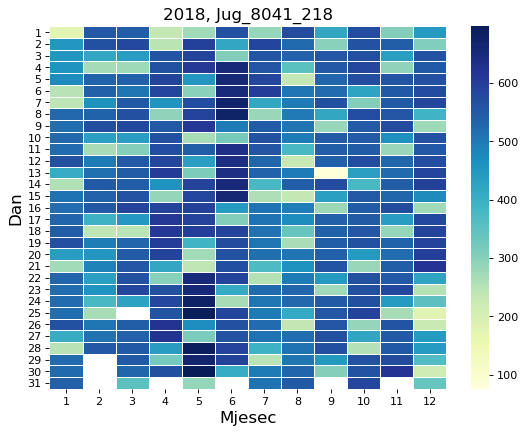

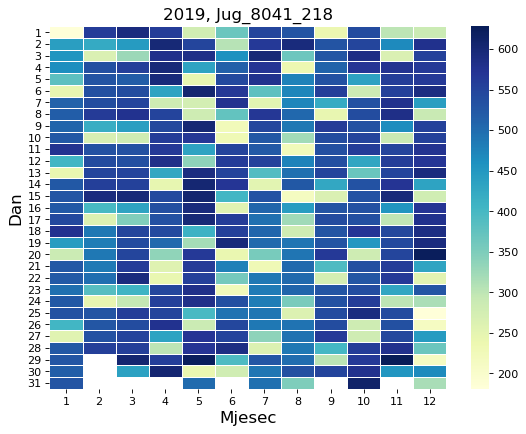

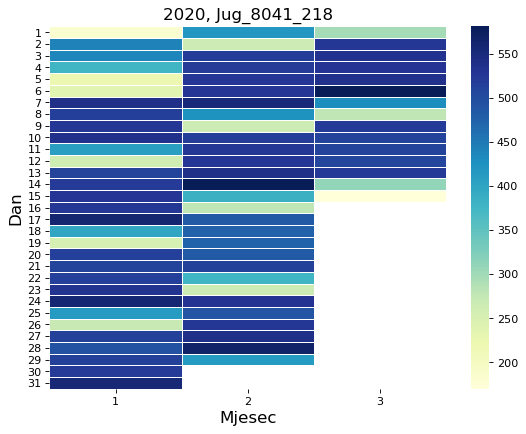

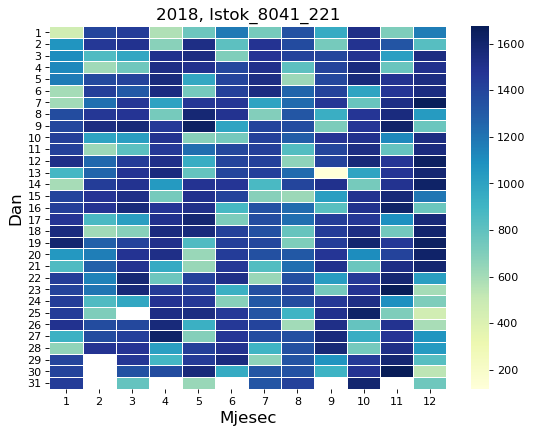

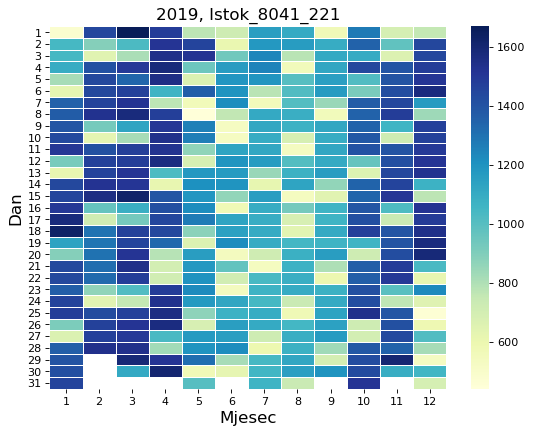

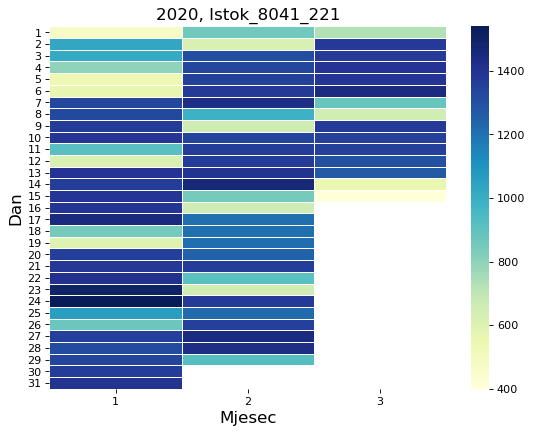

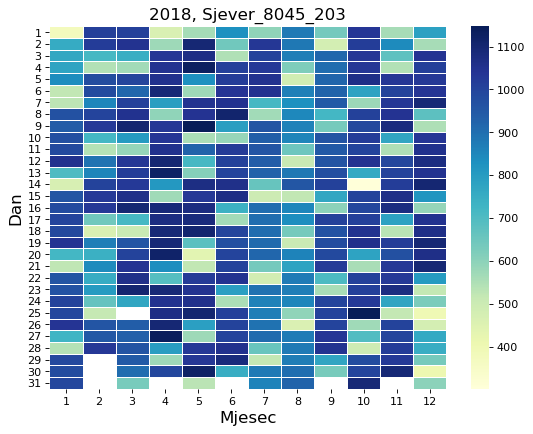

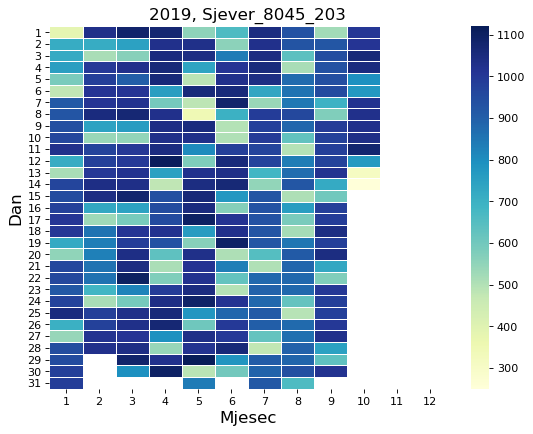

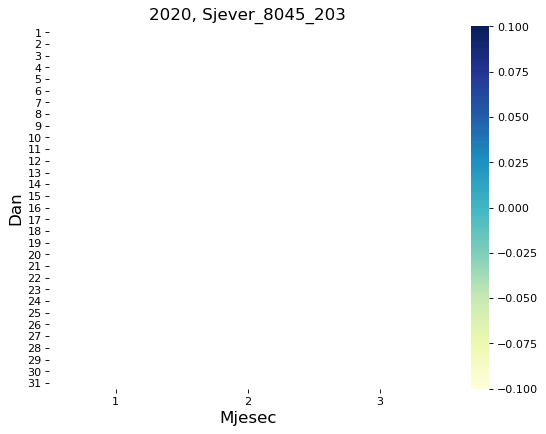

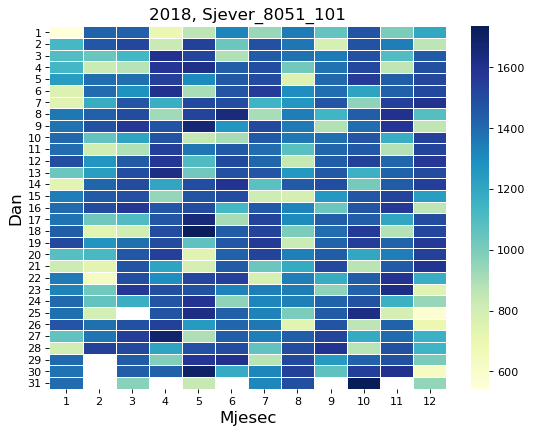

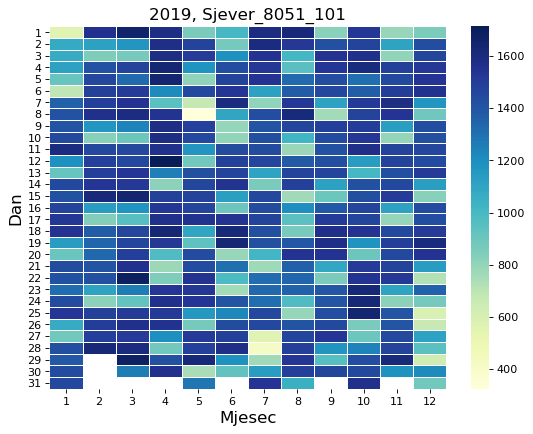

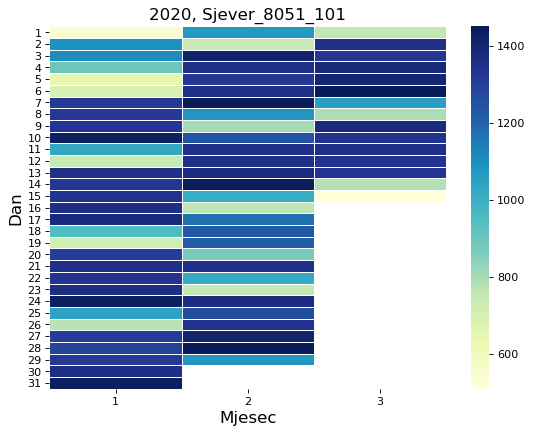

In [31]:
for traf,p in zip(traffic_roads,promet):
    for year in years:
        graf = heatmap_plot(traf,year,p)